In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train_dir = './data/train'
val_dir = './data/val'

In [3]:
def get_files_list(dir_name):
    files_list = []
    for path, subdirs, files in os.walk(dir_name):
        for name in files:
            files_list += [os.path.join(path, name)]
    return files_list

In [4]:
def get_lengths(files):
    lengths = []
    for file in files:
        lengths += [np.load(file).shape[0]]
    return lengths

In [5]:
noisy_val_files = get_files_list(os.path.join(val_dir, 'noisy'))
clean_val_files = get_files_list(os.path.join(val_dir, 'clean'))

noisy_train_files = get_files_list(os.path.join(train_dir, 'noisy'))
clean_train_files = get_files_list(os.path.join(train_dir, 'clean'))

In [6]:
noisy_val_lens = get_lengths(noisy_val_files)
clean_val_lens = get_lengths(clean_val_files)

noisy_train_lens = get_lengths(noisy_train_files)
clean_train_lens = get_lengths(clean_train_files)

In [11]:
lengths = noisy_val_lens + clean_val_lens + noisy_train_lens + clean_train_lens

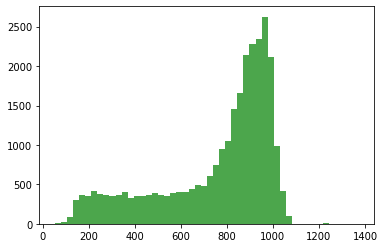

In [12]:
import matplotlib.pyplot as plt

plt.hist(lengths, 50, color ='green', alpha = 0.7);

In [13]:
length = 256

In [15]:
def create_dataset_for_classif(noisy, clean, noisy_lengths, clean_lengths):
    return pd.concat([pd.DataFrame({'path': noisy, 'class': [1] * len(noisy), 'len': noisy_lengths}), 
                     pd.DataFrame({'path': clean, 'class': [0] * len(clean), 'len': clean_lengths})])

In [16]:
val_df = create_dataset_for_classif(noisy_val_files, clean_val_files, noisy_val_lens, clean_val_lens)
train_df = create_dataset_for_classif(noisy_train_files, clean_train_files, noisy_train_lens, clean_train_lens)

In [17]:
val_df = val_df[val_df['len'] >= length]
train_df = train_df[train_df['len'] >= length]

In [18]:
val_df.to_json('./data/annotations_classif_val.json', orient='records')
train_df.to_json('./data/annotations_classif_train.json', orient='records')

In [19]:
val_df = pd.DataFrame({'noisy': noisy_val_files, 'clean': clean_val_files, 'len': clean_val_lens}) 
train_df = pd.DataFrame({'noisy': noisy_train_files, 'clean': clean_train_files, 'len': clean_train_lens}) 

In [20]:
val_df = val_df[val_df['len'] >= length]
train_df = train_df[train_df['len'] >= length]

In [21]:
val_df.to_json('./data/annotations_denoising_val.json', orient='records')
train_df.to_json('./data/annotations_denoising_train.json', orient='records')